In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import plotly.express as px

# Чтение данных

In [2]:
URL_BASE = 'https://raw.githubusercontent.com/pashkovsn/pashkov.sergei/refs/heads/main/Study/karpov.courses/lesson1/'

def read_database(file_name):
    return pd.read_csv(os.path.join(URL_BASE, file_name))

In [3]:
try:
    df_sales_detail = read_database('2022-04-01T12_df_sales_detail.csv')
    print(df_sales_detail.head())
except FileNotFoundError as e:
    print(f"File not found: {e}")

   sale_id           good  price                 date user_id
0  1000001  mexican pizza    720  2022-02-04 10:00:24  1c1543
1  1000002    chefs pizza    840  2022-02-04 10:02:28  a9a6e8
2  1000002   orange juice     90  2022-02-04 10:02:28  a9a6e8
3  1000003   cheese pizza    600  2022-02-04 10:02:35  23420a
4  1000003  italian pizza    720  2022-02-04 10:02:35  23420a


In [4]:
df_sales_detail.groupby('good')['price'].sum().sort_values(ascending=False).head(3)

good
chefs pizza               24558240
double pepperoni pizza    22558380
chicken bbq pizza         17622540
Name: price, dtype: int64

# Преобразование данных

In [5]:
df_sales_detail['date'] = pd.to_datetime(df_sales_detail['date'])
df_sales_detail['day'] = df_sales_detail['date'].dt.date

In [ ]:
df_sales_cnt = (
    df_sales_detail[['good', 'price', 'day']]
    .groupby(['day','good'])
    .agg(count=('price', 'count'))
    .reset_index()
)
df_sales_cnt.head()

,day,good,count
0,2022-02-04,4 cheese pizza,383
1,2022-02-04,apple juice,311
2,2022-02-04,cheese pizza,503
3,2022-02-04,chefs pizza,596
4,2022-02-04,cherry juice,220


# Графики

## Линейные графики

### matplotlib.pyplot

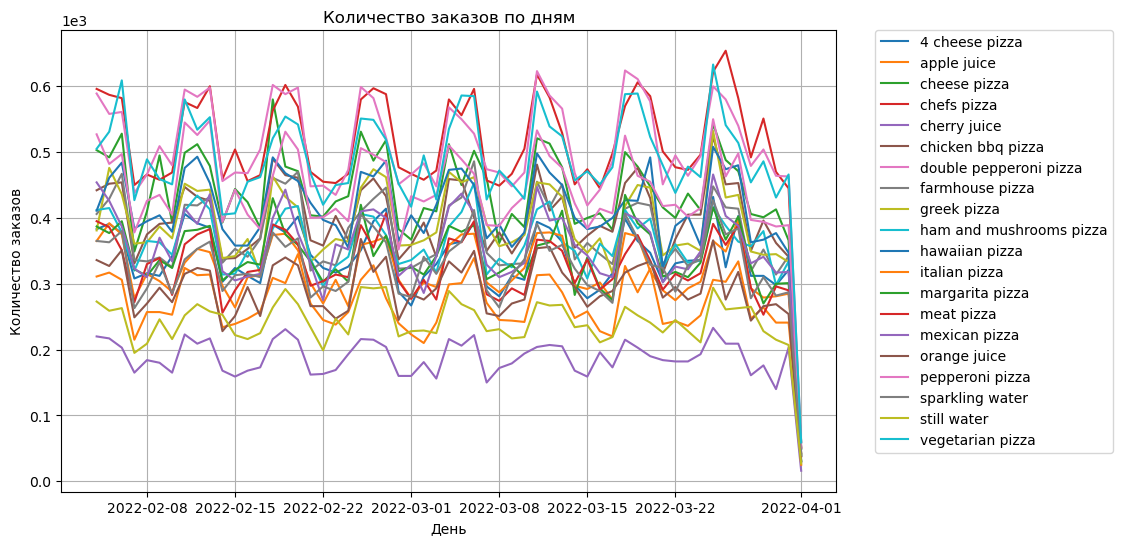

In [ ]:
X = df_sales_cnt['day']
goods = df_sales_cnt['good'].unique()

for good in goods:
    subset = df_sales_cnt[df_sales_cnt['good'] == good]  
    plt.plot(subset['day'], subset['count'], label=f'{good}') 

Y = df_sales_cnt['count']

plt.rcParams['figure.figsize'] = (10, 6)
plt.title('Количество заказов по дням')
plt.legend(
    loc='upper left',  
    bbox_to_anchor=(1.05, 1),  
    borderaxespad=0
)
plt.ticklabel_format(axis='y', style='sci', scilimits=(3, 3))
plt.xlabel('День')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()

### seaborn

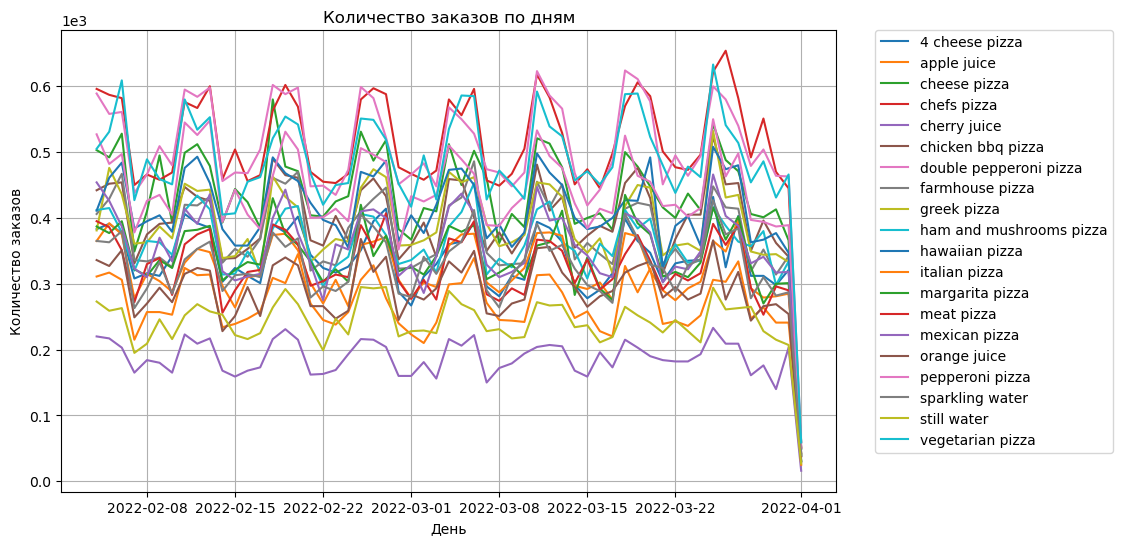

In [25]:
X = df_sales_cnt['day']
goods = df_sales_cnt['good'].unique()  

plt.figure(figsize=(10, 6))

for good in goods:
    subset = df_sales_cnt[df_sales_cnt['good'] == good]  
    sns.lineplot(x=subset['day'], y=subset['count'], label=f'{good}')  

plt.title('Количество заказов по дням')
plt.xlabel('День')
plt.ylabel('Количество заказов')

plt.legend(
    loc='upper left',
    bbox_to_anchor=(1.05, 1),
    borderaxespad=0
)

plt.ticklabel_format(axis='y', style='sci', scilimits=(3, 3))
plt.grid()
plt.show()

### plotly.express

In [26]:
# Построение графика
fig = px.line(
    df_sales_cnt,
    x='day',
    y='count',
    color='good',  # Линии разделяются по значению 'good'
    title='Количество заказов по дням',
    labels={'count': 'Количество заказов', 'day': 'День', 'good': 'Товар'}
)

# Настройка легенды
fig.update_layout(
    legend=dict(
        x=1.05,  # Смещение легенды за пределы графика по оси X
        y=1,     # Легенда сверху графика
        borderwidth=1,
        bordercolor='gray'
    ),
    margin=dict(r=150),  # Дополнительное пространство для отображения легенды
    yaxis_tickformat='~s'  # Форматирование оси Y в тысячах
)

# Показ графика
fig.show()

## Столбчатые диаграммы

### matplotlib.pyplot

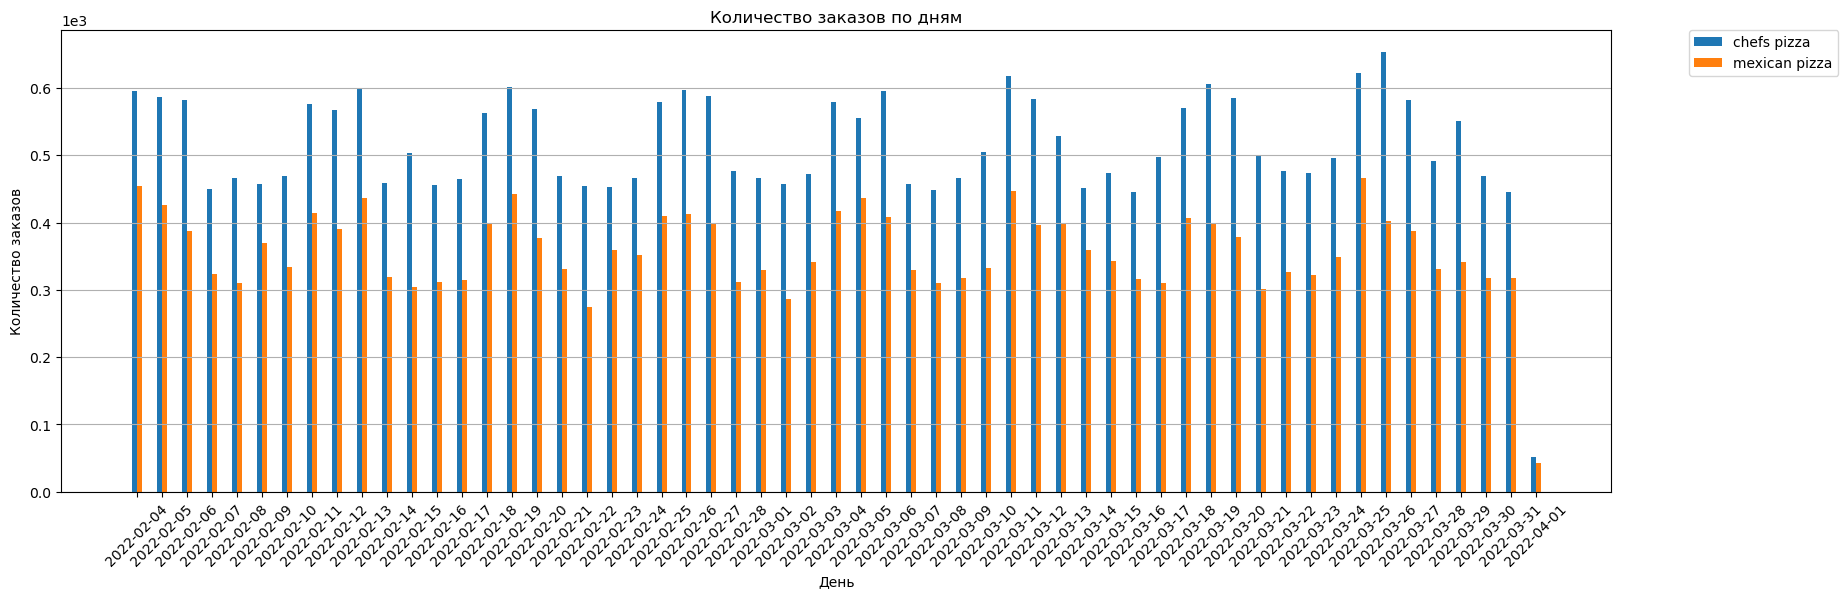

In [31]:
X = df_sales_cnt['day']
# goods = df_sales_cnt['good'].unique()
goods = ['chefs pizza','mexican pizza']

# Установка ширины столбцов и смещения для группировки
bar_width = 0.2
x_positions = range(len(df_sales_cnt['day'].unique()))

for i, good in enumerate(goods):
    subset = df_sales_cnt[df_sales_cnt['good'] == good]
    # Смещение столбцов для каждого товара
    offset = [pos + i * bar_width for pos in x_positions]
    plt.bar(offset, subset['count'], width=bar_width, label=f'{good}')

# Настройка оси X
plt.xticks(
    [pos + bar_width * (len(goods) / 2 - 0.5) for pos in x_positions],
    df_sales_cnt['day'].unique(),
    rotation=45
)

# Размер графика
plt.rcParams['figure.figsize'] = (20, 6)

# Настройки
plt.title('Количество заказов по дням')
plt.legend(
    loc='upper left',
    bbox_to_anchor=(1.05, 1),
    borderaxespad=0
)
plt.ticklabel_format(axis='y', style='sci', scilimits=(3, 3))
plt.xlabel('День')
plt.ylabel('Количество заказов')
plt.grid(axis='y')
plt.show()

### seaborn

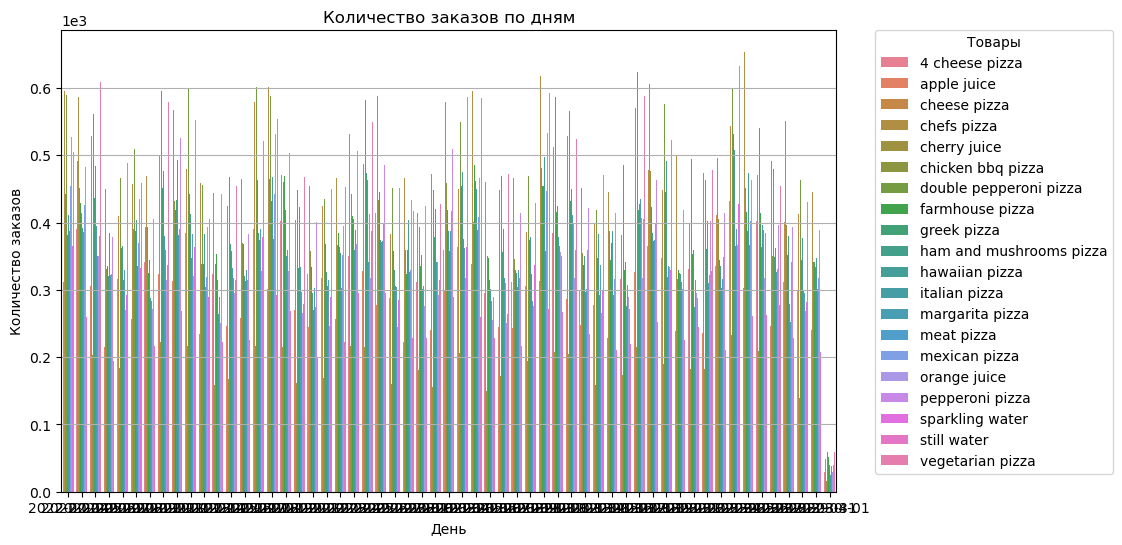

In [32]:
plt.figure(figsize=(10, 6))

# Построение столбчатой диаграммы с разделением по товарам
sns.barplot(
    data=df_sales_cnt,
    x='day',
    y='count',
    hue='good'  # Разделение по товарам
)

# Настройка заголовков и подписей
plt.title('Количество заказов по дням')
plt.xlabel('День')
plt.ylabel('Количество заказов')

# Настройка легенды за пределами графика
plt.legend(
    loc='upper left',
    bbox_to_anchor=(1.05, 1),
    borderaxespad=0,
    title="Товары"
)

# Настройка разрядности оси Y
plt.ticklabel_format(axis='y', style='sci', scilimits=(3, 3))

# Добавление сетки
plt.grid(axis='y')

# Показ графика
plt.show()

### plotly.express

In [33]:
# Построение графика
fig = px.bar(
    df_sales_cnt,
    x='day',
    y='count',
    color='good',  # Линии разделяются по значению 'good'
    title='Количество заказов по дням',
    labels={'count': 'Количество заказов', 'day': 'День', 'good': 'Товар'}
)

# Настройка легенды
fig.update_layout(
    legend=dict(
        x=1.05,  # Смещение легенды за пределы графика по оси X
        y=1,     # Легенда сверху графика
        borderwidth=1,
        bordercolor='gray'
    ),
    margin=dict(r=150),  # Дополнительное пространство для отображения легенды
    yaxis_tickformat='~s'  # Форматирование оси Y в тысячах
)

# Показ графика
fig.show()

## Круговые диаграммы

In [34]:
df_sales_cyrcle = (
    df_sales_detail[['good', 'price', 'day']]
    .groupby('good')
    .agg(count=('price', 'sum'))
    .reset_index()
)
df_sales_cyrcle.head()

,good,count
0,4 cheese pizza,14957280
1,apple juice,1379700
2,cheese pizza,15004200
3,chefs pizza,24558240
4,cherry juice,957510


### matplotlib.pyplot

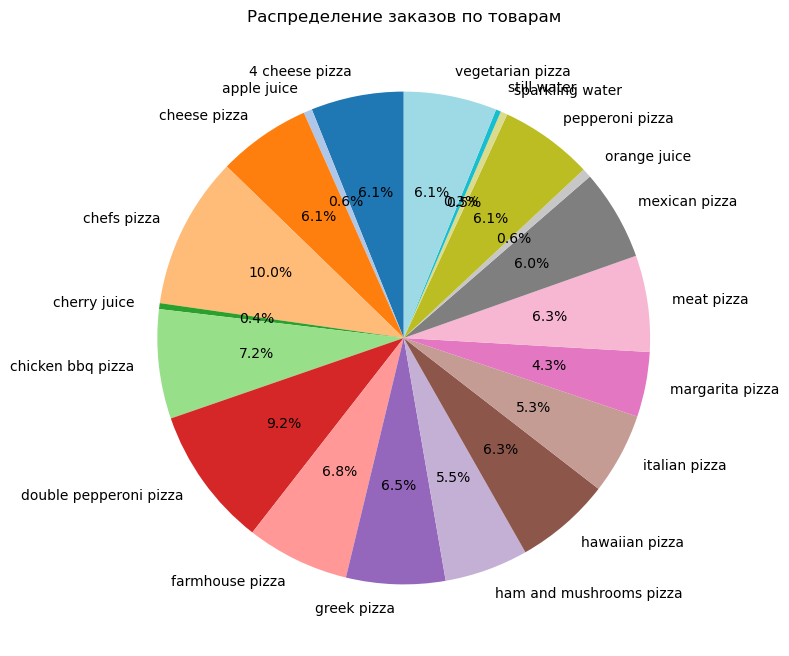

In [35]:
# Данные для круговой диаграммы
goods = df_sales_cyrcle['good']
counts = df_sales_cyrcle['count']

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(
    counts,
    labels=goods,
    autopct='%1.1f%%',  # Проценты на диаграмме
    startangle=90,      # Начальная ориентация
    colors=plt.cm.tab20.colors  # Цветовая палитра
)

plt.title('Распределение заказов по товарам')
plt.show()

### seaborn

Не поддерживается

### plotly.express

In [36]:
# Построение круговой диаграммы
fig = px.pie(
    df_sales_cyrcle,
    values='count',
    names='good',
    title='Распределение заказов по товарам',
    color_discrete_sequence=px.colors.qualitative.Set3  # Цветовая палитра
)

fig.update_traces(
    textposition='inside',  # Подписи внутри секций
    textinfo='percent+label'  # Отображение процентов и категорий
)

fig.show()

## Диаграммы с областями

### matplotlib.pyplot

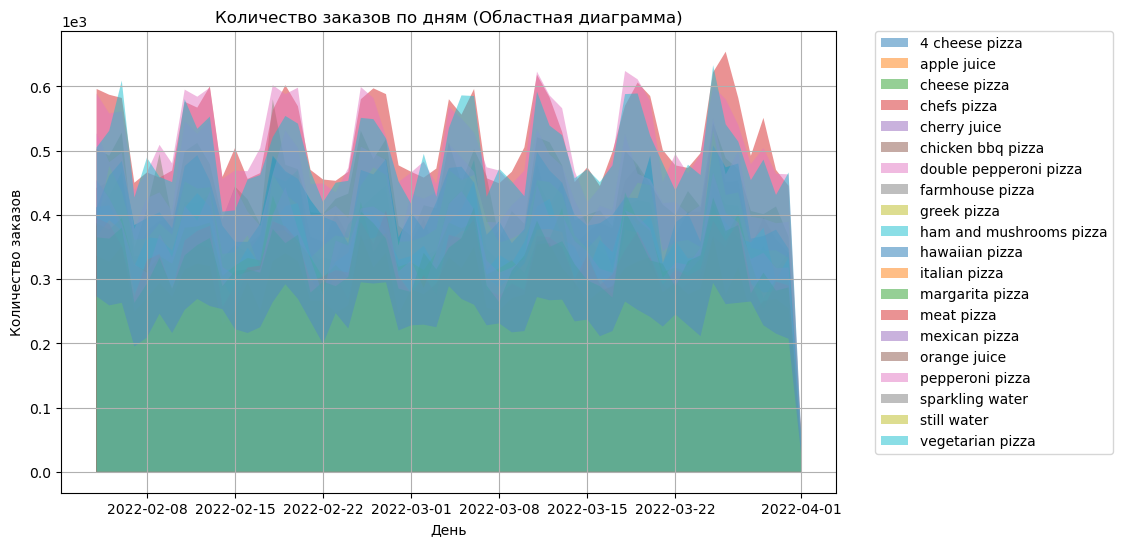

In [37]:
# Данные для построения диаграммы с областями
goods = df_sales_cnt['good'].unique()

# Настройка графика
plt.figure(figsize=(10, 6))

for good in goods:
    subset = df_sales_cnt[df_sales_cnt['good'] == good]
    plt.fill_between(subset['day'], subset['count'], label=f'{good}', alpha=0.5)

# Заголовок и подписи
plt.title('Количество заказов по дням (Областная диаграмма)')
plt.xlabel('День')
plt.ylabel('Количество заказов')

# Легенда
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)

# Настройки осей и сетки
plt.ticklabel_format(axis='y', style='sci', scilimits=(3, 3))
plt.grid()

# Показ графика
plt.show()

### seaborn

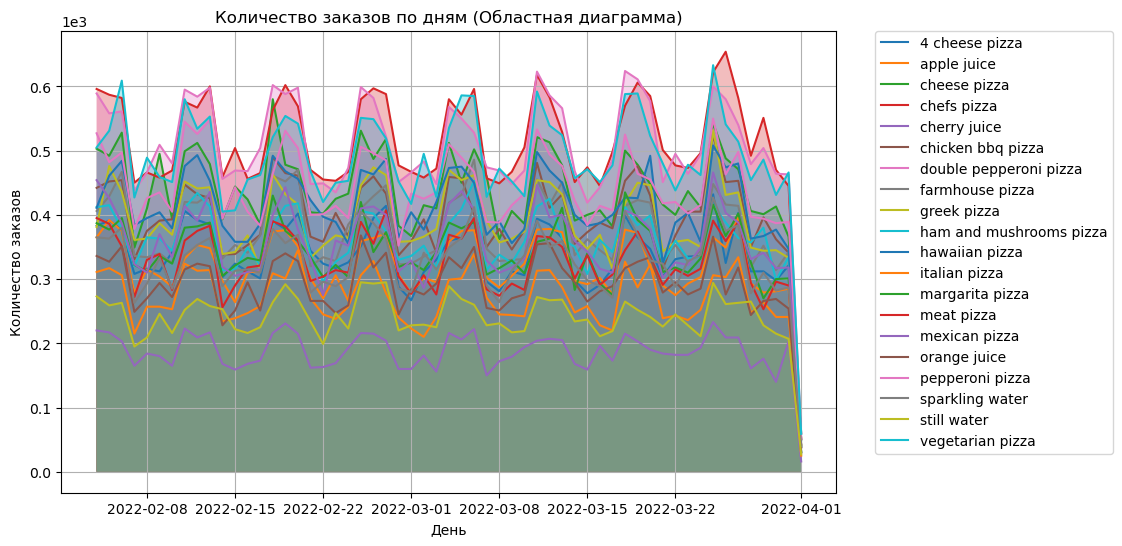

In [38]:
# Данные для построения диаграммы с областями
plt.figure(figsize=(10, 6))

for good in goods:
    subset = df_sales_cnt[df_sales_cnt['good'] == good]
    sns.lineplot(x=subset['day'], y=subset['count'], label=f'{good}')
    plt.fill_between(subset['day'], subset['count'], alpha=0.3)

# Заголовок и подписи
plt.title('Количество заказов по дням (Областная диаграмма)')
plt.xlabel('День')
plt.ylabel('Количество заказов')

# Легенда
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)

# Настройки осей и сетки
plt.ticklabel_format(axis='y', style='sci', scilimits=(3, 3))
plt.grid()

# Показ графика
plt.show()

### plotly.express

In [39]:
# Построение диаграммы с областями
fig = px.area(
    df_sales_cnt,
    x='day',
    y='count',
    color='good',
    title='Количество заказов по дням (Областная диаграмма)',
    labels={'count': 'Количество заказов', 'day': 'День', 'good': 'Товар'}
)

fig.update_layout(
    legend=dict(
        x=1.05,
        y=1,
        borderwidth=1,
        bordercolor='gray'
    ),
    margin=dict(r=150),
    yaxis_tickformat='~s'
)

fig.show()

## Пузырьковая диаграмма

In [40]:
df_sales_cnt = (
    df_sales_detail[['good', 'price', 'day']]
    .groupby(['day', 'good'])
    .agg(
        count=('price', 'count'),
        avg_price=('price', 'mean')  # Добавляем среднюю цену
    )
    .reset_index()
)
df_sales_cnt.head()

,day,good,count,avg_price
0,2022-02-04,4 cheese pizza,383,780.0
1,2022-02-04,apple juice,311,90.0
2,2022-02-04,cheese pizza,503,600.0
3,2022-02-04,chefs pizza,596,840.0
4,2022-02-04,cherry juice,220,90.0


### matplotlib.pyplot

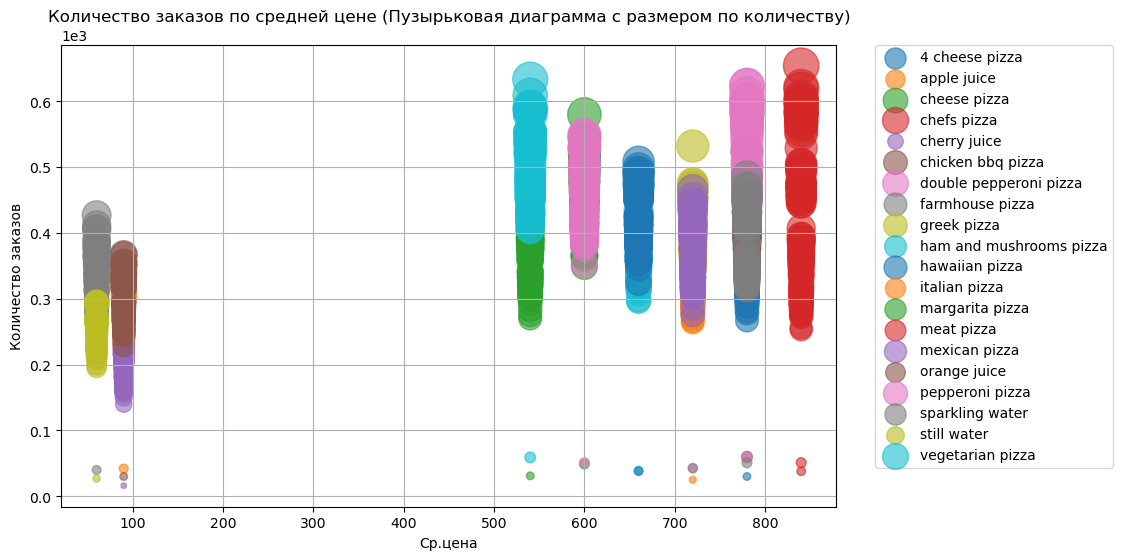

In [46]:
# Построение пузырьковой диаграммы с агрегацией
plt.figure(figsize=(10, 6))

for good in df_sales_cnt['good'].unique():
    subset = df_sales_cnt[df_sales_cnt['good'] == good]
    plt.scatter(
        subset['avg_price'], 
        subset['count'], 
        s=subset['count'],  # Размер пузырьков пропорционален количеству
        label=f'{good}',
        alpha=0.6
    )

# Заголовок и подписи
plt.title('Количество заказов по средней цене (Пузырьковая диаграмма с размером по количеству)')
plt.xlabel('Ср.цена')
plt.ylabel('Количество заказов')

# Легенда
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)

# Настройки осей и сетки
plt.ticklabel_format(axis='y', style='sci', scilimits=(3, 3))
plt.grid()

# Показ графика
plt.show()

### seaborn

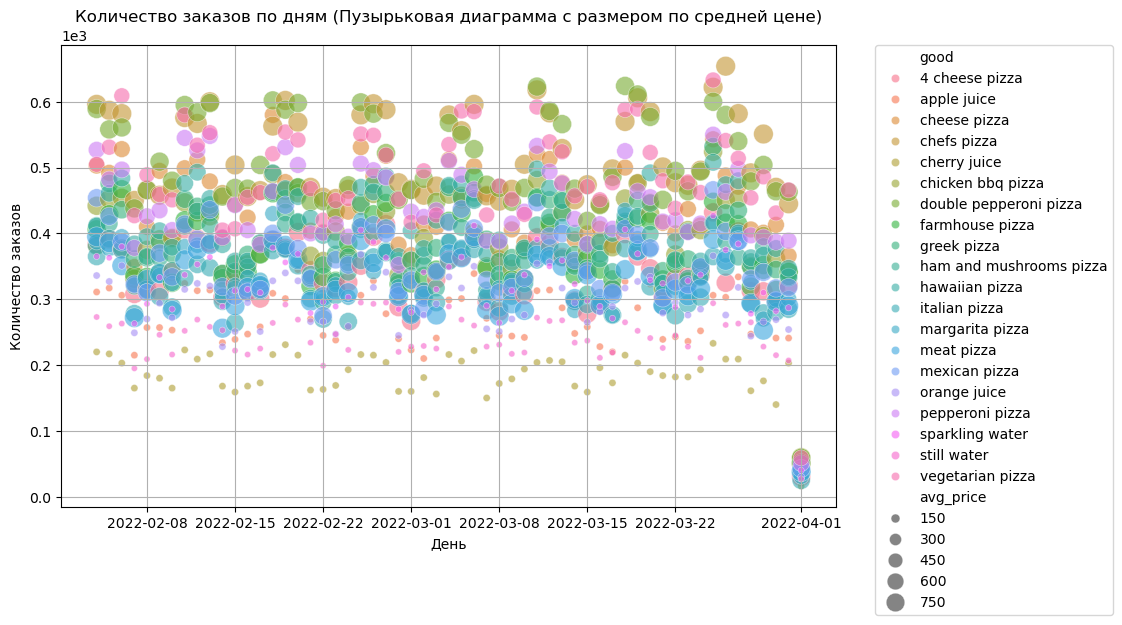

In [48]:
# Построение пузырьковой диаграммы с агрегацией
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_sales_cnt,
    x='day',
    y='count',
    size='avg_price',  # Размер пузырьков пропорционален средней цене
    hue='good',  # Разделение данных по товарам
    sizes=(20, 200),  # Минимальный и максимальный размер пузырьков
    alpha=0.6  # Прозрачность
)

# Заголовок и подписи
plt.title('Количество заказов по дням (Пузырьковая диаграмма с размером по средней цене)')
plt.xlabel('День')
plt.ylabel('Количество заказов')

# Легенда
plt.legend(
    loc='upper left',
    bbox_to_anchor=(1.05, 1),
    borderaxespad=0
)

# Настройки осей и сетки
plt.ticklabel_format(axis='y', style='sci', scilimits=(3, 3))
plt.grid()

# Показ графика
plt.show()

### plotly.express

In [50]:
# Построение пузырьковой диаграммы с агрегацией
fig = px.scatter(
    df_sales_cnt,
    x='day',
    y='count',
    size='avg_price',  # Размер пузырьков пропорционален средней цене
    color='good',  # Цвет пузырьков по 'good'
    title='Количество заказов по дням (Пузырьковая диаграмма с размером по средней цене)',
    labels={'count': 'Количество заказов', 'day': 'День', 'good': 'Товар'}
)

# Настройка легенды
fig.update_layout(
    legend=dict(
        x=1.05,
        y=1,
        borderwidth=1,
        bordercolor='gray'
    ),
    margin=dict(r=150),
    yaxis_tickformat='~s'
)

fig.show()
